In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))

svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]]

svm_clf.predict(X_new)

array([ True, False])

In [5]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

# Non-Linear SVM

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [8]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [9]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3), 
    StandardScaler(), 
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)


polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [10]:
from sklearn.svm import SVC


poly_kernel_svm_clf = make_pipeline(StandardScaler(), 
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))


poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

# another models 

In [24]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['y'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

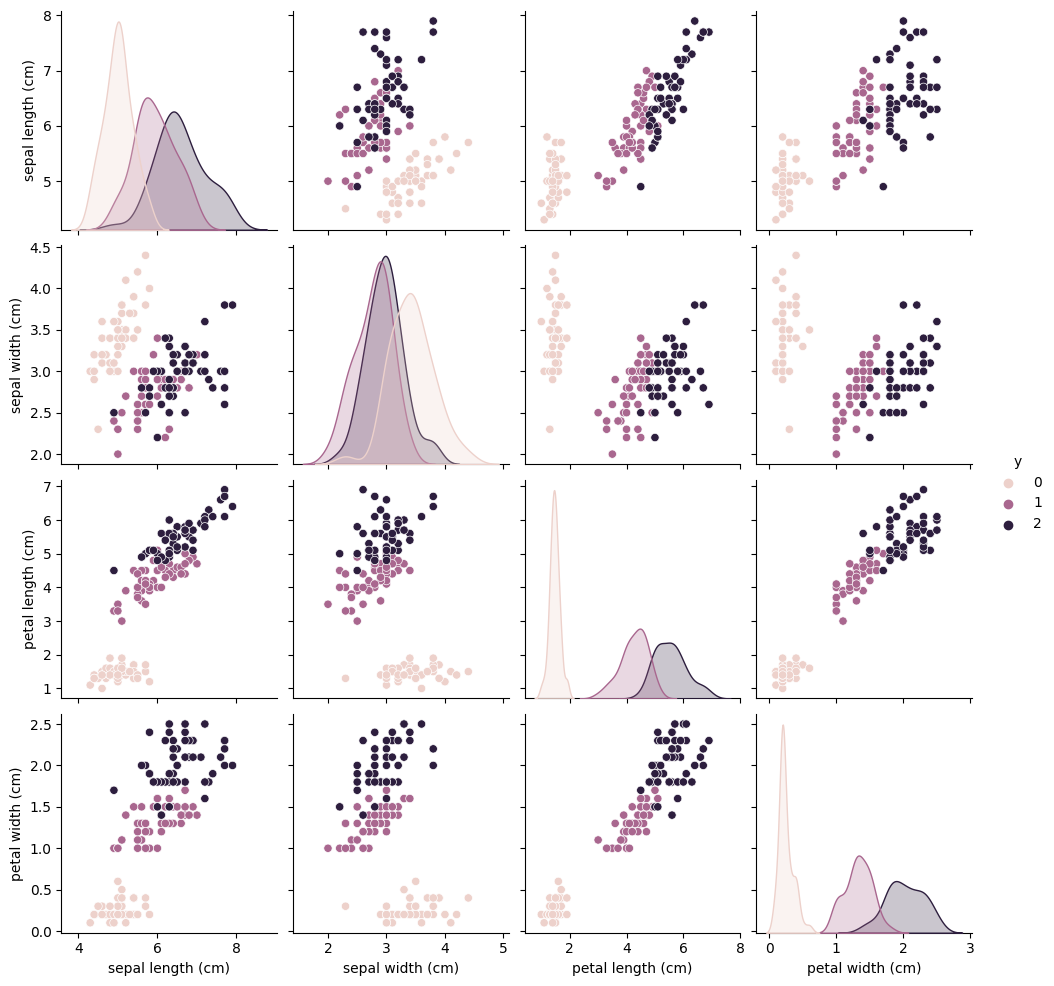

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='y')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression

# Filter to only include two classes
df_binary = df[df['species'] != 2]
X_binary = df_binary.drop('species', axis=1)
y_binary = df_binary['species']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

model_lr = LogisticRegression()
model_lr.fit(X_train_bin, y_train_bin)

# Evaluate
score_lr = model_lr.score(X_test_bin, y_test_bin)
print(f"Logistic Regression Accuracy: {score_lr:.2f}")


Logistic Regression Accuracy: 1.00


SVM Accuracy: 1.00


# on SVM

In [16]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f"SVM Accuracy: {score:.2f}")


SVM Accuracy: 1.00


# v0.2

In [17]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


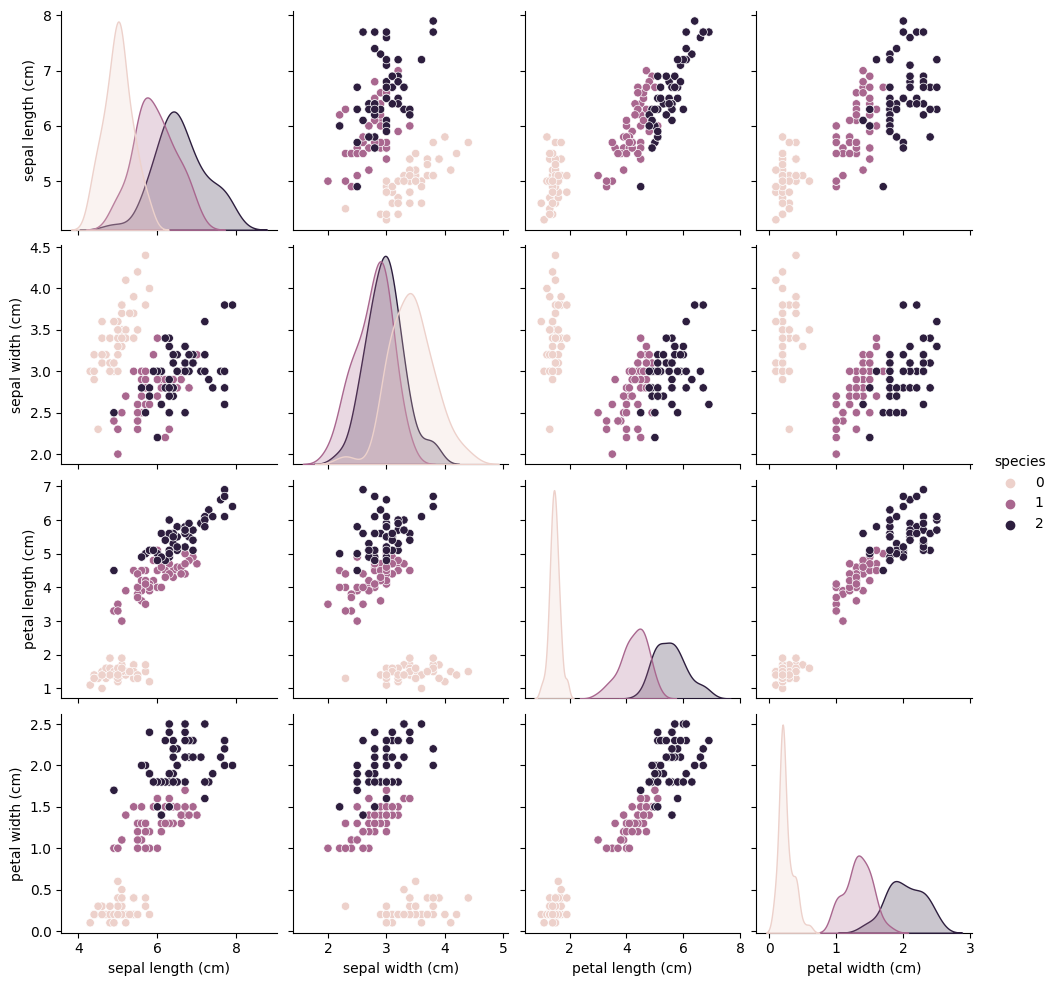

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the model
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

# Evaluate the model
y_pred = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Linear SVM Accuracy: {accuracy:.2f}")


Linear SVM Accuracy: 1.00


In [21]:
model_svm_poly = SVC(kernel='poly', degree=3)
model_svm_poly.fit(X_train, y_train)

# Evaluate the model
y_pred_poly = model_svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial SVM Accuracy: {accuracy_poly:.2f}")


Polynomial SVM Accuracy: 1.00


In [22]:
model_svm_rbf = SVC(kernel='rbf')
model_svm_rbf.fit(X_train, y_train)

# Evaluate the model
y_pred_rbf = model_svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")


RBF SVM Accuracy: 1.00
